In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from time import time

%matplotlib inline

In [2]:
start=time()

## 1) Load datasets

### Flights

In [3]:
flights_df=pd.read_csv('./Data/dat_F_sub.csv', index_col='Unnamed: 0')
print(len(flights_df))
flights_df.head()

3584


,Airfield,Flight_ID,Sch_Departure,Act_Departure,Time_of_Day,Period_of_Week,Day_of_Week,Month,Season,Year,...,max,mean_WTL,mean_City_Flag,mode_BFO_Dest_City,sum_city_mode,N_of_Dest_City,mode_BFO_Dest_Country_Code,sum_country_mode,N_of_Dest_Country,Delay_in_Seconds
1,AUC,18095,1851408360,1851408360,2 - MORNING,1 - WEEKDAY,5 - FRI,09 - SEP,3 - SUMMER,2028,...,10.0,0,0.0,BORQUE,55,1,BOR,55,1,0
2,AUC,18096,1851408780,1851408780,2 - MORNING,1 - WEEKDAY,5 - FRI,09 - SEP,3 - SUMMER,2028,...,11.0,0,0.0,VES033,38,1,VES,38,1,0
3,AUC,18097,1851410760,1851410760,2 - MORNING,1 - WEEKDAY,5 - FRI,09 - SEP,3 - SUMMER,2028,...,11.0,0,0.0,BORQUE,32,1,BOR,32,1,0
4,AUC,18098,1851411960,1851411960,2 - MORNING,1 - WEEKDAY,5 - FRI,09 - SEP,3 - SUMMER,2028,...,8.0,0,0.0,VES064,21,1,VES,21,1,0
5,AUC,18099,1851413760,1851413760,2 - MORNING,1 - WEEKDAY,5 - FRI,09 - SEP,3 - SUMMER,2028,...,14.0,0,0.0,BORCWL,50,2,BOR,57,1,0


#### Summary
This dataset is a list of 3584 flights departing from AUC in 2028. Information for each flight includes time and date, destination data and overall information regarding the passengers on the flight.

In [4]:
#all flights departing from AUC
Counter(flights_df.Airfield)

Counter({'AUC': 3584})

In [5]:
Counter(flights_df.Year)

Counter({2028: 3584})

We plot the distiributions of scheduled and actual departure times. Note the two periods of low activity (less flights departing). What happened at the end of October and November?

count                    3584
unique                   3433
top       2028-10-30 18:34:00
freq                        3
first     2028-09-01 08:06:00
last      2028-12-31 20:06:00
Name: Sch_Departure, dtype: object


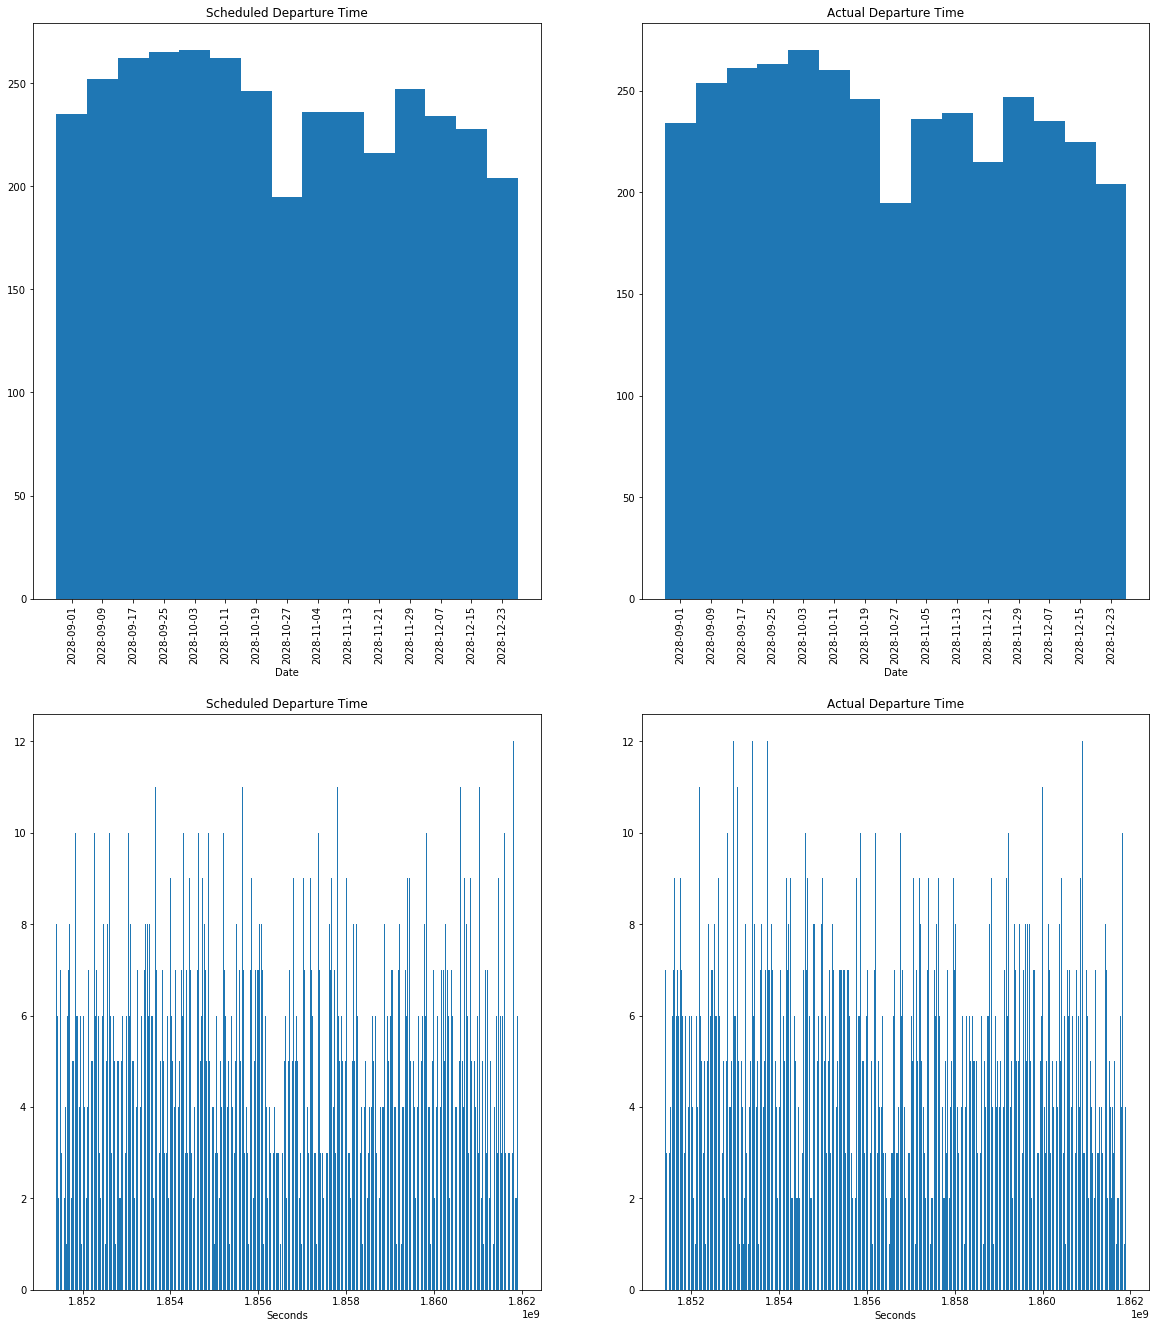

In [6]:
print(pd.to_datetime(flights_df.Sch_Departure, unit='s').describe())

plt.figure(1)
plt.subplots(figsize=(20, 20))
plt.subplots_adjust(bottom=0.0001)

plt.subplot(221)
hist=np.histogram(flights_df.Sch_Departure, bins=15)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/15)
plt.xticks(hist[1][:-1],[datetime.fromtimestamp(x).date() for x in hist[1][:-1]], rotation='vertical')
plt.title('Scheduled Departure Time')
plt.xlabel('Date')

plt.subplot(222)
hist=np.histogram(flights_df.Act_Departure, bins=15)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/15)
plt.xticks(hist[1][:-1],[datetime.fromtimestamp(x).date() for x in hist[1][:-1]], rotation='vertical')
plt.title('Actual Departure Time')
plt.xlabel('Date')

plt.subplot(223)
hist=np.histogram(flights_df.Sch_Departure, bins=1000)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/1000)
plt.title('Scheduled Departure Time')
plt.xlabel('Seconds')

plt.subplot(224)
hist=np.histogram(flights_df.Act_Departure, bins=1000)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/1000)
plt.title('Actual Departure Time')
plt.xlabel('Seconds')

Flights are scheduled to depart between the morning and evening. There are less flights on Friday and we seem to have slightly more flights in October. Our data begins on September 1 and ends on December 31, with summer ending on September 21st so we expect significantly more Autumn data.

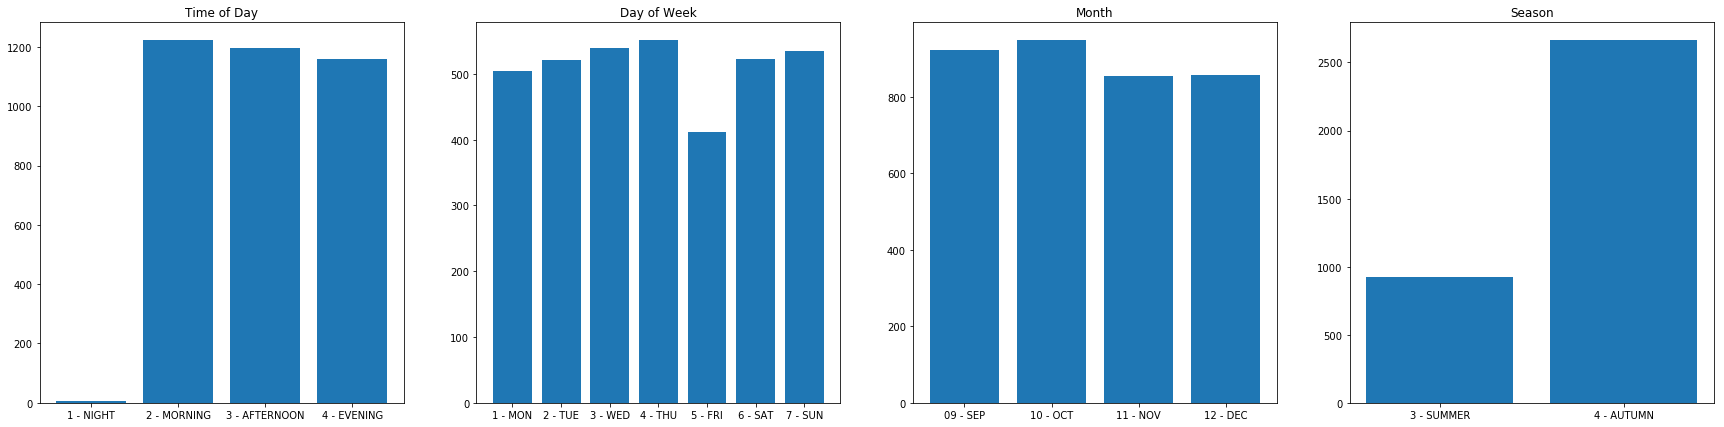

In [7]:
plt.figure(1)
plt.subplots(figsize=(30, 7))

plt.subplot(141)
counter=sorted(Counter(flights_df.Time_of_Day).items(), key=lambda x: x[0])
plt.bar(np.arange(len(counter)), [x[1] for x in counter])
plt.xticks(np.arange(len(counter)),[x[0] for x in counter])
plt.title("Time of Day")

plt.subplot(142)
counter=sorted(Counter(flights_df.Day_of_Week).items(), key=lambda x: x[0])
plt.bar(np.arange(len(counter)), [x[1] for x in counter])
plt.xticks(np.arange(len(counter)),[x[0] for x in counter])
plt.title("Day of Week")

plt.subplot(143)
counter=sorted(Counter(flights_df.Month).items(), key=lambda x: x[0])
plt.bar(np.arange(len(counter)), [x[1] for x in counter])
plt.xticks(np.arange(len(counter)),[x[0] for x in counter])
plt.title("Month")

plt.subplot(144)
counter=sorted(Counter(flights_df.Season).items(), key=lambda x: x[0])
plt.bar(np.arange(len(counter)), [x[1] for x in counter])
plt.xticks(np.arange(len(counter)),[x[0] for x in counter])
plt.title("Season")

plt.show()

Here are the distributions of number of passengers on a given flight. Most flights have arount 36 passengers, of which about 27 are scanned at S1.

count    3584.000000
mean       31.845982
std        18.754231
min         1.000000
25%        19.750000
50%        32.000000
75%        41.000000
max       220.000000
Name: tot_pass, dtype: float64
count    3584.000000
mean       27.137556
std        16.470673
min         0.000000
25%        16.000000
50%        27.000000
75%        37.000000
max       174.000000
Name: N, dtype: float64


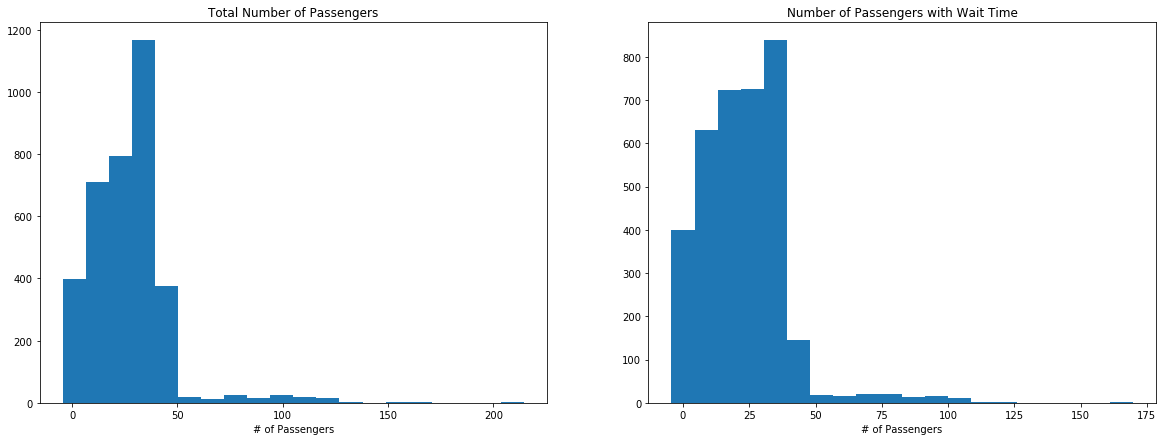

In [8]:
print(flights_df.tot_pass.describe())
print(flights_df.N.describe())

plt.figure(1)
plt.subplots(figsize=(20, 7))

plt.subplot(121)
hist=np.histogram(flights_df.tot_pass, bins=20)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/20)
plt.title('Total Number of Passengers')
plt.xlabel('# of Passengers')

plt.subplot(122)
hist=np.histogram(flights_df.N, bins=20)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/20)
plt.title('Number of Passengers with Wait Time')
plt.xlabel('# of Passengers')

plt.show()

The distributions of Wait_Time data shows that most people wait at most 10 minutes. A wait time of over 20 minutes is abnormal.

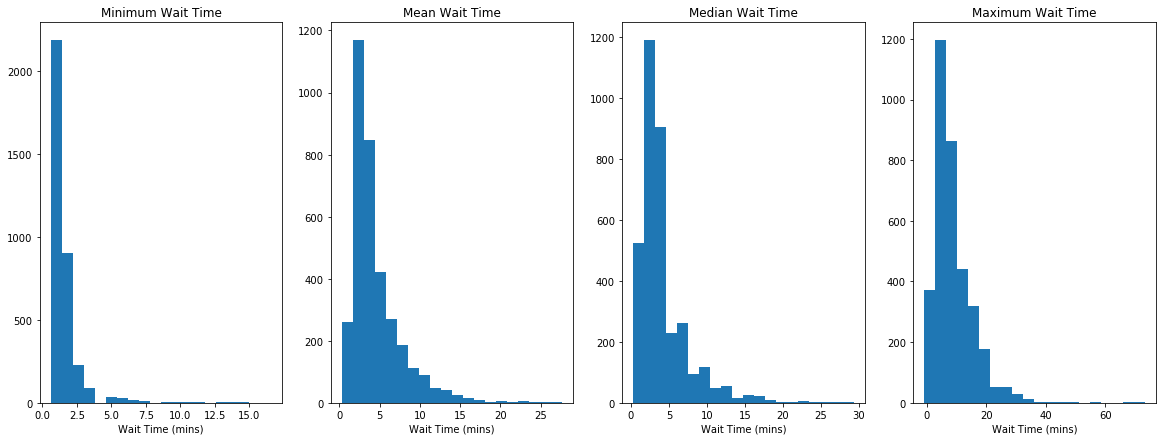

In [9]:
plt.figure(1)
plt.subplots(figsize=(20, 7))

plt.subplot(141)
hist=np.histogram(flights_df['min'].dropna(), bins=20)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/20)
plt.title('Minimum Wait Time')
plt.xlabel('Wait Time (mins)')

plt.subplot(142)
hist=np.histogram(flights_df['mean'].dropna(), bins=20)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/20)
plt.title('Mean Wait Time')
plt.xlabel('Wait Time (mins)')

plt.subplot(143)
hist=np.histogram(flights_df['median'].dropna(), bins=20)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/20)
plt.title('Median Wait Time')
plt.xlabel('Wait Time (mins)')

plt.subplot(144)
hist=np.histogram(flights_df['max'].dropna(), bins=20)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/20)
plt.title('Maximum Wait Time')
plt.xlabel('Wait Time (mins)')

plt.show()

No flights have passengers with Wait Time > 4 hours

In [10]:
Counter(flights_df.mean_WTL)

Counter({0: 3584})

Almost no flights have passengers with BFO Dest City information.

In [11]:
Counter(flights_df.mean_City_Flag)

Counter({0.0: 3582, 0.048780487804878099: 1, 1.0: 1})

Destination City

Most flights have all passengers going to the same city. The most common destination city is BORQUE.

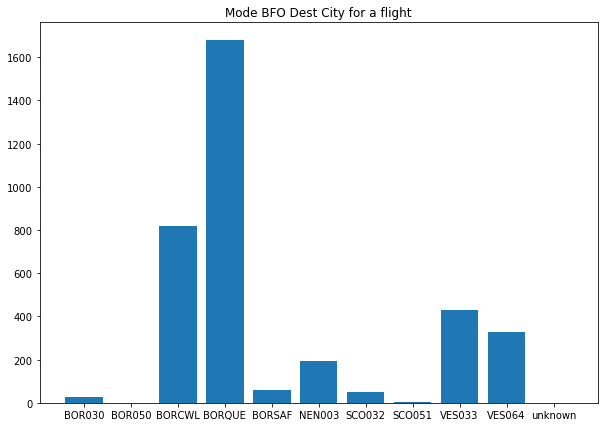

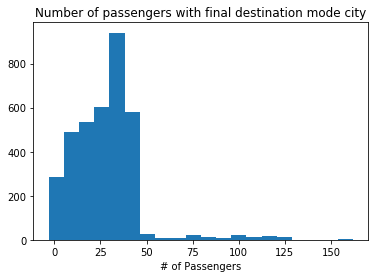

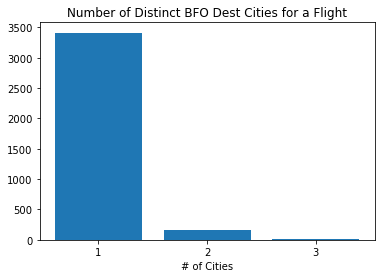

In [12]:
plt.figure(1)
plt.subplots(figsize=(10, 7))

temp=['unknown' if x!=x else x for x in flights_df.mode_BFO_Dest_City]
counter=sorted(Counter(temp).items(), key=lambda x: x[0])
b=plt.bar(np.arange(len(counter)), [x[1] for x in counter])
plt.xticks(np.arange(len(counter)),[x[0] for x in counter])
plt.title("Mode BFO Dest City for a flight")
plt.show()

hist=np.histogram(flights_df.sum_city_mode, bins=20)
b=plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/20)
plt.title('Number of passengers with final destination mode city')
plt.xlabel('# of Passengers')
plt.show()

counter=sorted(Counter(flights_df.N_of_Dest_City).items(), key=lambda x: x[0])
b=plt.bar(np.arange(len(counter)), [x[1] for x in counter])
plt.xticks(np.arange(len(counter)),[x[0] for x in counter])
plt.title('Number of Distinct BFO Dest Cities for a Flight')
plt.xlabel('# of Cities')
plt.show()

Destination Country

Most flights have all passengers going to/staying in the same country. The most common destination country is Borealia.

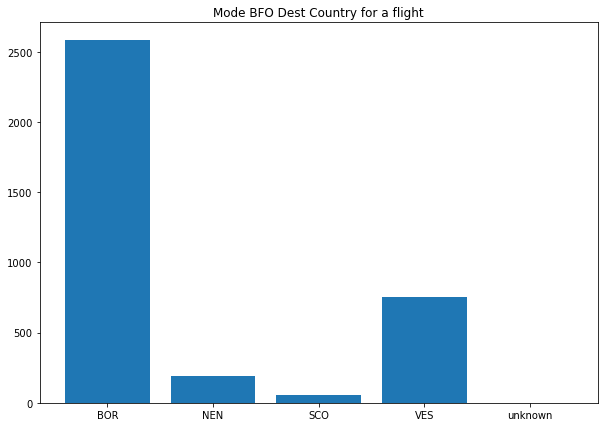

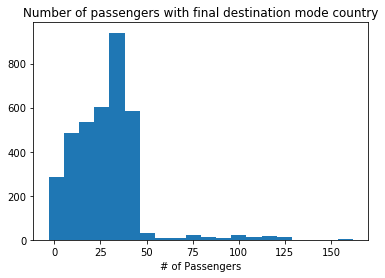

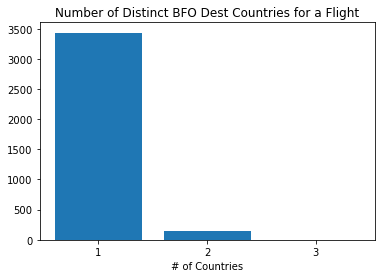

In [13]:
plt.figure(1)
plt.subplots(figsize=(10, 7))
temp=['unknown' if x!=x else x for x in flights_df.mode_BFO_Dest_Country_Code]
counter=sorted(Counter(temp).items(), key=lambda x: x[0])
plt.bar(np.arange(len(counter)), [x[1] for x in counter])
plt.xticks(np.arange(len(counter)),[x[0] for x in counter])
plt.title("Mode BFO Dest Country for a flight")
plt.show()

hist=np.histogram(flights_df.sum_country_mode, bins=20)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/20)
plt.title('Number of passengers with final destination mode country')
plt.xlabel('# of Passengers')
plt.show()

counter=sorted(Counter(flights_df.N_of_Dest_Country).items(), key=lambda x: x[0])
plt.bar(np.arange(len(counter)), [x[1] for x in counter])
plt.xticks(np.arange(len(counter)),[x[0] for x in counter])
plt.title('Number of Distinct BFO Dest Countries for a Flight')
plt.xlabel('# of Countries')
plt.show()

Most flights are delayed no more than 10 minutes and the distribution of delay times appears to be exponential.

count    3584.000000
mean       15.443359
std        51.168720
min       -24.000000
25%         0.000000
50%         0.000000
75%        10.000000
max      1670.000000
Name: Delay_in_minutes, dtype: float64


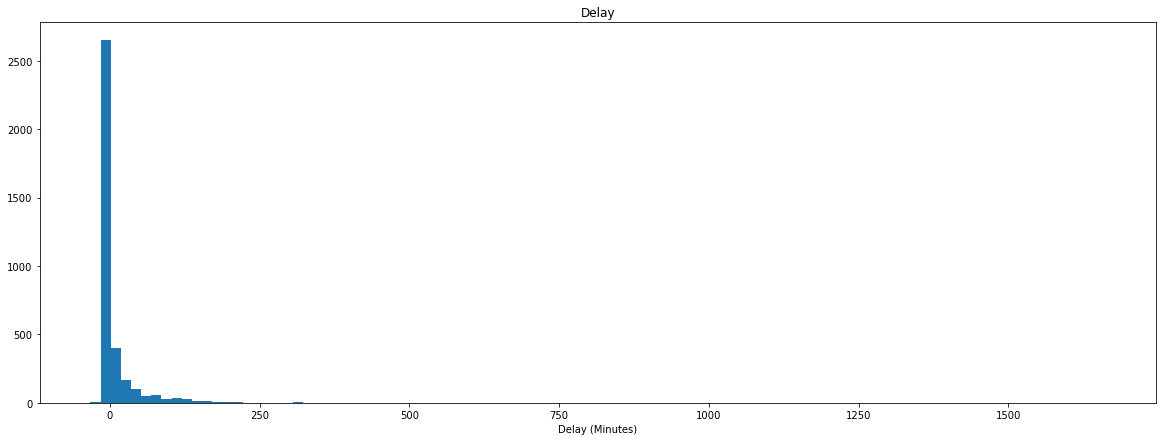

In [14]:
flights_df['Delay_in_minutes']=[x/60 for x in flights_df.Delay_in_Seconds]

print(flights_df.Delay_in_minutes.describe())

plt.figure(1)
plt.subplots(figsize=(20, 7))

hist=np.histogram(flights_df.Delay_in_minutes, bins=100)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/100)
plt.title('Delay')
plt.xlabel('Delay (Minutes)')

plt.show()

### Passengers

The passenger dataset describes each of 114132 passengers, their experience through screening, their final destination, and date and time data.

In [15]:
passengers_df=pd.read_csv('./Data/dat_P_sub_c.csv', index_col='Pass_ID')
print(len(passengers_df))
passengers_df.head()

114132


,valid_P_ID,Airfield,S2,Wait_Time,C_Start,C0,C_avg,Sch_Departure,Act_Departure,BFO_Dest_City,...,Day_of_Week,Month,Season,Year,WT_flag,S2_Sch_Flag,S2_Act_Flag,Sch_Act_Flag,Flight_ID,Delay_in_Seconds
Pass_ID,,,,,,,,,,,,,,,,,,,,,
5348206,1,AUC,2028-09-01 6:37,NaN,1,1,1.0,2028-09-01 8:06,2028-09-01 8:06,BORQUE,...,5 - FRI,09 - SEP,3 - SUMMER,2028,1,0,0,0,18095,0
5348209,1,AUC,2028-09-01 6:38,NaN,1,1,1.0,2028-09-01 8:06,2028-09-01 8:06,BORQUE,...,5 - FRI,09 - SEP,3 - SUMMER,2028,1,0,0,0,18095,0
5348216,1,AUC,2028-09-01 6:39,NaN,1,1,1.0,2028-09-01 8:06,2028-09-01 8:06,BORQUE,...,5 - FRI,09 - SEP,3 - SUMMER,2028,1,0,0,0,18095,0
5348224,1,AUC,2028-09-01 6:39,NaN,1,1,1.0,2028-09-01 8:06,2028-09-01 8:06,BORQUE,...,5 - FRI,09 - SEP,3 - SUMMER,2028,1,0,0,0,18095,0
5348225,1,AUC,2028-09-01 6:40,NaN,1,1,1.0,2028-09-01 8:06,2028-09-01 8:06,BORQUE,...,5 - FRI,09 - SEP,3 - SUMMER,2028,1,0,0,0,18095,0


#### Summary

Most passengers have a wait time.

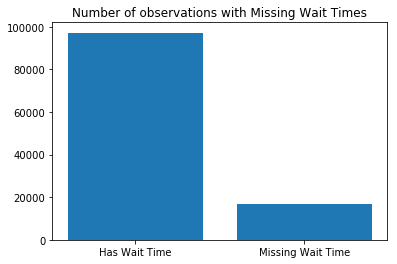

In [16]:
counter=sorted(Counter(passengers_df.WT_flag).items(), key=lambda x: x[0])
b=plt.bar(np.arange(len(counter)), [x[1] for x in counter])
plt.xticks(np.arange(len(counter)),['Has Wait Time', 'Missing Wait Time'])
plt.title('Number of observations with Missing Wait Times')
plt.show()

If S2 is greater than the scheduled departure time then if the flight was on time, then the passenger would have missed their flight.

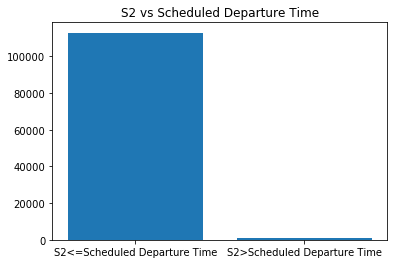

In [17]:
counter=sorted(Counter(passengers_df.S2_Sch_Flag).items(), key=lambda x: x[0])
b=plt.bar(np.arange(len(counter)), [x[1] for x in counter])
plt.xticks(np.arange(len(counter)),['S2<=Scheduled Departure Time', 'S2>Scheduled Departure Time'])
plt.title('S2 vs Scheduled Departure Time')
plt.show()

If S2 is greater than the actual departure time then the passenger missed their flight. This did not happen very often.

[(0, 113847), (1, 285)]


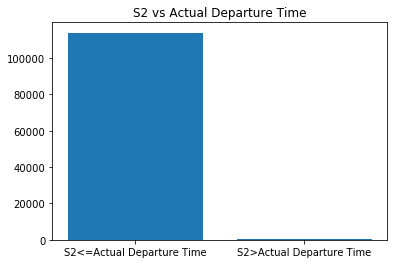

In [48]:
counter=sorted(Counter(passengers_df.S2_Act_Flag).items(), key=lambda x: x[0])
print(counter)
b=plt.bar(np.arange(len(counter)), [x[1] for x in counter])
plt.xticks(np.arange(len(counter)),['S2<=Actual Departure Time', 'S2>Actual Departure Time'])
plt.title('S2 vs Actual Departure Time')
plt.show()

The following chart shows the number of early flights vs late flights. Most flights are on time or delayed. Very few flights leave early.

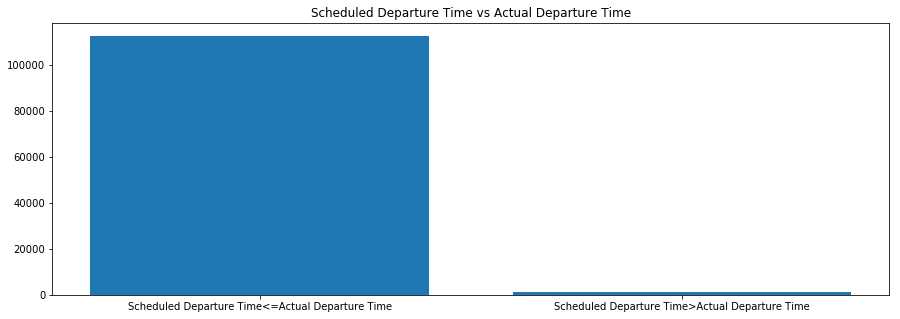

In [19]:
plt.subplots(figsize=(15, 5))
counter=sorted(Counter(passengers_df.Sch_Act_Flag).items(), key=lambda x: x[0])
b=plt.bar(np.arange(len(counter)), [x[1] for x in counter])
plt.xticks(np.arange(len(counter)),['Scheduled Departure Time<=Actual Departure Time', 'Scheduled Departure Time>Actual Departure Time'])
plt.title('Scheduled Departure Time vs Actual Departure Time')
plt.show()

Most passengers suffered delays of at most 10 minutes. This makes sense because we recall that most flights are delayed at most 10 minutes.

count    114132.000000
mean         15.198971
std          50.773490
min         -24.000000
25%           0.000000
50%           0.000000
75%          10.000000
max        1670.000000
Name: Delay_in_minutes, dtype: float64


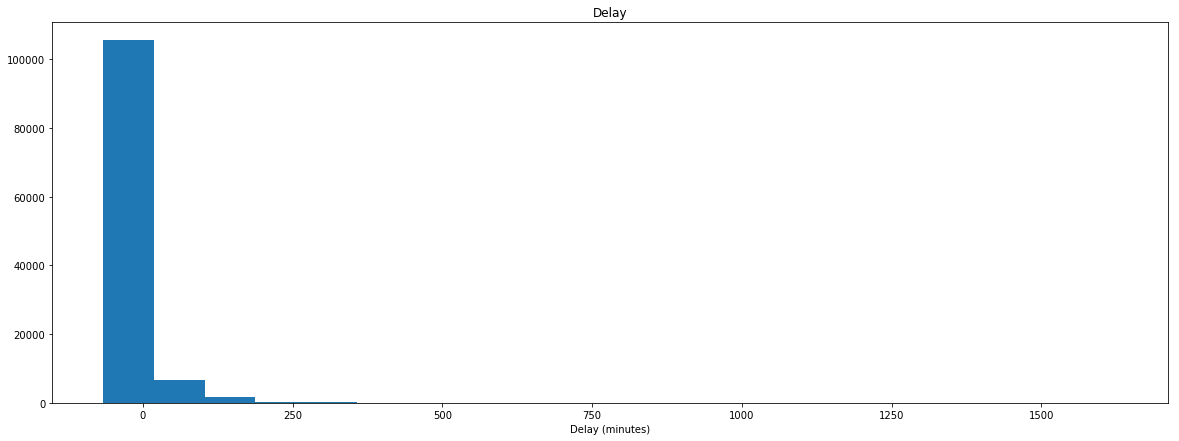

In [20]:
passengers_df['Delay_in_minutes']=[x/60 for x in passengers_df.Delay_in_Seconds]

print(passengers_df.Delay_in_minutes.describe())

plt.figure(1)
plt.subplots(figsize=(20, 7))

hist=np.histogram(passengers_df.Delay_in_minutes, bins=20)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/20)
plt.title('Delay')
plt.xlabel('Delay (minutes)')

plt.show()

## 2) Passenger-level Dataset Exploration: S2 Patterns

In [21]:
passengers_df['S2_Month']=[int(x.split(' ')[0].split('-')[1]) for x in passengers_df.S2]
passengers_df['S2_Hour']=[int(x.split(' ')[1].split(':')[0]) for x in passengers_df.S2]
passengers_df['S2_Minute']=[int(x.split(' ')[1].split(':')[1]) for x in passengers_df.S2]

The airfield appears to be in operation between 6am and 9pm. Most passengers arrive around 7am.

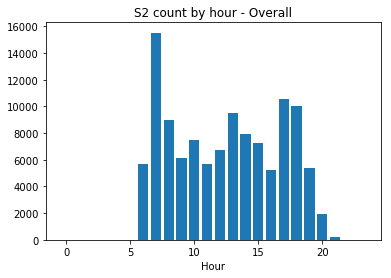

In [22]:
counter=Counter(passengers_df.S2_Hour)
idx=np.arange(24)
plt.bar(idx, [counter[x] if x in counter.keys() else 0 for x in idx])
plt.xlabel("Hour")
plt.title("S2 count by hour - Overall")
plt.show()

The hourly patterns of S2 scans is similar for each month.

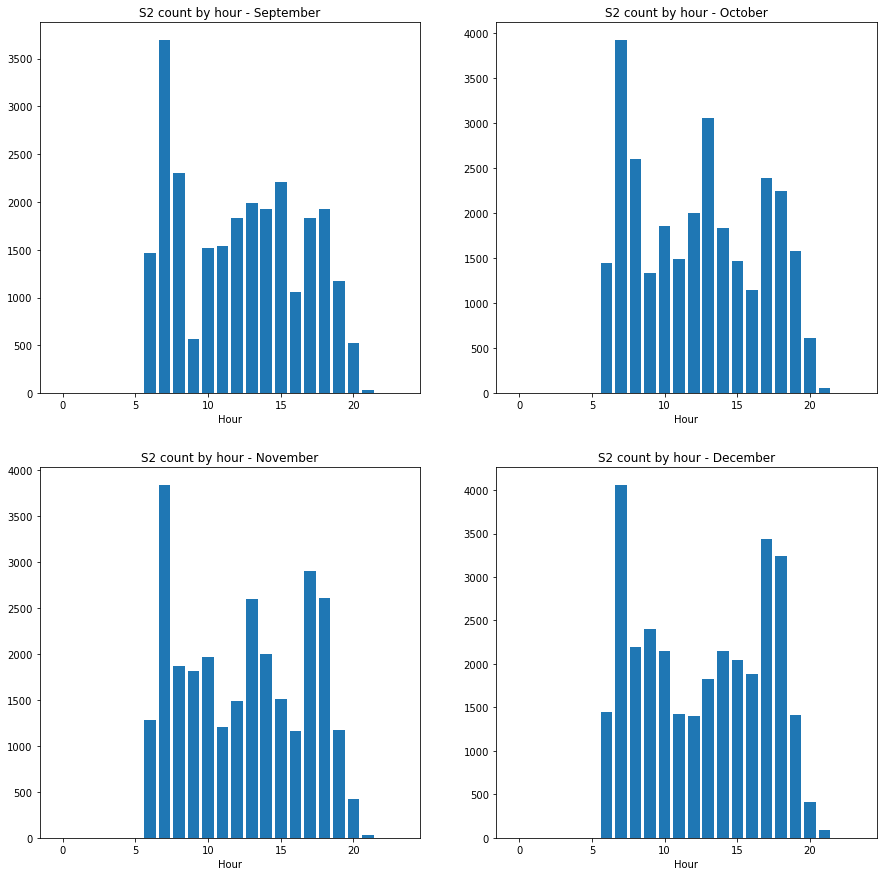

In [23]:
plt.figure(1)
plt.subplots(figsize=(15, 15))

plt.subplot(221)
counter=Counter(passengers_df.query("S2_Month == '09'").S2_Hour)
idx=np.arange(24)
plt.bar(idx, [counter[x] if x in counter.keys() else 0 for x in idx])
plt.xlabel("Hour")
plt.title("S2 count by hour - September")

plt.subplot(222)
counter=Counter(passengers_df.query("S2_Month == '10'").S2_Hour)
idx=np.arange(24)
plt.bar(idx, [counter[x] if x in counter.keys() else 0 for x in idx])
plt.xlabel("Hour")
plt.title("S2 count by hour - October")

plt.subplot(223)
counter=Counter(passengers_df.query("S2_Month == '11'").S2_Hour)
idx=np.arange(24)
plt.bar(idx, [counter[x] if x in counter.keys() else 0 for x in idx])
plt.xlabel("Hour")
plt.title("S2 count by hour - November")

plt.subplot(224)
counter=Counter(passengers_df.query("S2_Month == '12'").S2_Hour)
idx=np.arange(24)
plt.bar(idx, [counter[x] if x in counter.keys() else 0 for x in idx])
plt.xlabel("Hour")
plt.title("S2 count by hour - December")

plt.show()

In [24]:
per_hour={'Total':Counter(passengers_df.S2_Hour),
 'September':Counter(passengers_df.query("S2_Month == '09'").S2_Hour),
 'October':Counter(passengers_df.query("S2_Month == '10'").S2_Hour),
 'November':Counter(passengers_df.query("S2_Month == '11'").S2_Hour),
 'December':Counter(passengers_df.query("S2_Month == '12'").S2_Hour),
}
pd.DataFrame(per_hour).fillna(0)

,December,November,October,September,Total
6,1453,1279.0,1448.0,1470.0,5650
7,4061,3843.0,3926.0,3695.0,15525
8,2199,1868.0,2608.0,2308.0,8983
9,2398,1814.0,1338.0,566.0,6116
10,2153,1970.0,1862.0,1519.0,7504
11,1422,1205.0,1492.0,1534.0,5653
12,1396,1489.0,2005.0,1829.0,6719
13,1824,2600.0,3062.0,1987.0,9473
14,2144,1998.0,1841.0,1931.0,7914
15,2044,1516.0,1467.0,2209.0,7236


Most people still arrive at 7am but there are more people arriving later on weekends.

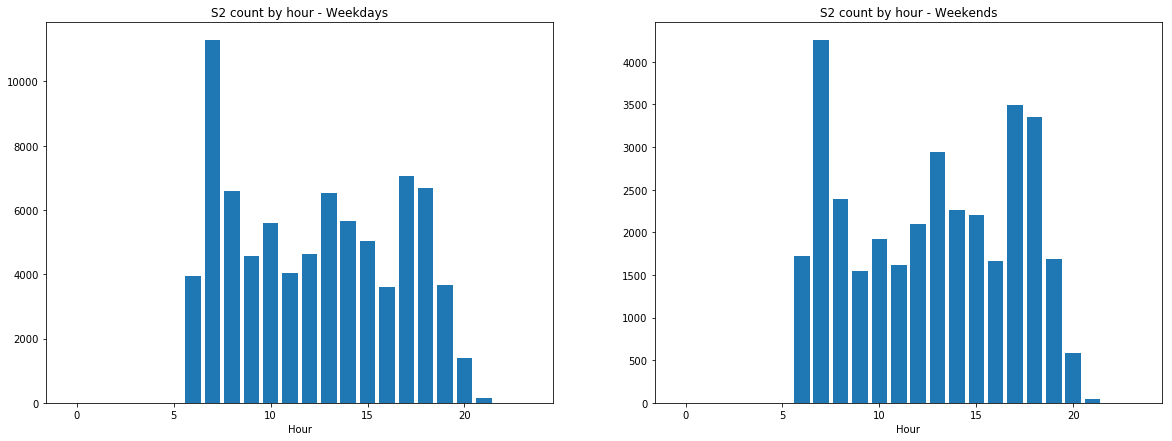

In [25]:
plt.figure(1)
plt.subplots(figsize=(20, 7))

plt.subplot(121)
counter=Counter(passengers_df.query("Period_of_Week == '1 - WEEKDAY'").S2_Hour)
idx=np.arange(24)
plt.bar(idx, [counter[x] if x in counter.keys() else 0 for x in idx])
plt.xlabel("Hour")
plt.title("S2 count by hour - Weekdays")

plt.subplot(122)
counter=Counter(passengers_df.query("Period_of_Week == '2 - WEEKEND'").S2_Hour)
idx=np.arange(24)
plt.bar(idx, [counter[x] if x in counter.keys() else 0 for x in idx])
plt.xlabel("Hour")
plt.title("S2 count by hour - Weekends")

plt.show()

## 3) Proportion of Passengers Scanned at S1

In [26]:
S1_by_hour=passengers_df.loc[:,['WT_flag','S2']]
S1_by_hour['S2_upToHour']=[x[:-3] for x in S1_by_hour.S2]
S1_by_hour['total']=[1]*len(S1_by_hour)
S1_by_hour=S1_by_hour.groupby('S2_upToHour').sum()
S1_by_hour['has_WT']=[row['total']-row['WT_flag'] for i,row in S1_by_hour.iterrows()]
S1_by_hour['WT_pcnt']=[1-row['WT_flag']/row['total'] for i,row in S1_by_hour.iterrows()]
S1_by_hour.head()

,WT_flag,total,has_WT,WT_pcnt
S2_upToHour,,,,
2028-09-01 10,2,39,37,0.948718
2028-09-01 11,2,14,12,0.857143
2028-09-01 12,2,32,30,0.937500
2028-09-01 13,2,60,58,0.966667
2028-09-01 14,8,83,75,0.903614


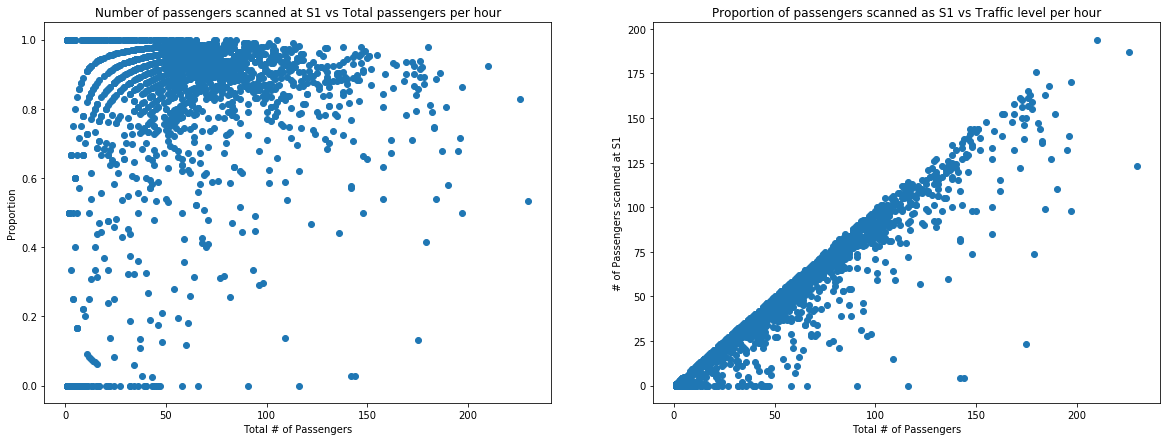

In [27]:
plt.figure(1)
plt.subplots(figsize=(20, 7))

plt.subplot(121)
plt.plot(S1_by_hour.total, S1_by_hour.WT_pcnt, 'o')
plt.title("Number of passengers scanned at S1 vs Total passengers per hour")
plt.xlabel("Total # of Passengers")
plt.ylabel("Proportion")

plt.subplot(122)
plt.plot(S1_by_hour.total, S1_by_hour.has_WT, 'o')
plt.title("Proportion of passengers scanned as S1 vs Traffic level per hour")
plt.xlabel("Total # of Passengers")
plt.ylabel("# of Passengers scanned at S1")
plt.show()

When the traffic is light, sometimes all passengers are scanned upon entry, probably because it is easy to scan everyone when there are not many people to scan. However, other times, a low proportion of passengers are scanned despite the low traffic. This could be because there is no lineup so they do not see a point in scanning them twice.

When the traffic is heavier, the proportion of passengers scanned tends to be higher. Presumably, scan data is valuable to the airfield when the traffic is high, so as to make sure they are handling high traffic adequately.

## 4)

In [28]:
passengers_df.head()

,valid_P_ID,Airfield,S2,Wait_Time,C_Start,C0,C_avg,Sch_Departure,Act_Departure,BFO_Dest_City,...,WT_flag,S2_Sch_Flag,S2_Act_Flag,Sch_Act_Flag,Flight_ID,Delay_in_Seconds,Delay_in_minutes,S2_Month,S2_Hour,S2_Minute
Pass_ID,,,,,,,,,,,,,,,,,,,,,
5348206,1,AUC,2028-09-01 6:37,NaN,1,1,1.0,2028-09-01 8:06,2028-09-01 8:06,BORQUE,...,1,0,0,0,18095,0,0.0,9,6,37
5348209,1,AUC,2028-09-01 6:38,NaN,1,1,1.0,2028-09-01 8:06,2028-09-01 8:06,BORQUE,...,1,0,0,0,18095,0,0.0,9,6,38
5348216,1,AUC,2028-09-01 6:39,NaN,1,1,1.0,2028-09-01 8:06,2028-09-01 8:06,BORQUE,...,1,0,0,0,18095,0,0.0,9,6,39
5348224,1,AUC,2028-09-01 6:39,NaN,1,1,1.0,2028-09-01 8:06,2028-09-01 8:06,BORQUE,...,1,0,0,0,18095,0,0.0,9,6,39
5348225,1,AUC,2028-09-01 6:40,NaN,1,1,1.0,2028-09-01 8:06,2028-09-01 8:06,BORQUE,...,1,0,0,0,18095,0,0.0,9,6,40


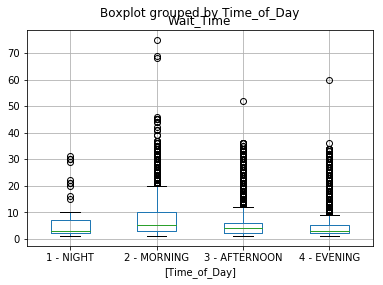

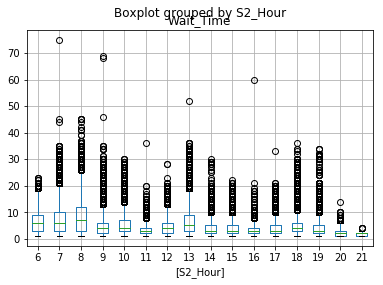

In [29]:
passengers_df.loc[:,['Wait_Time','Time_of_Day']].dropna().boxplot(by='Time_of_Day')
passengers_df.loc[:,['Wait_Time','S2_Hour']].dropna().boxplot(by='S2_Hour')

Wait times in the morning are longer, probably due to higher traffic volume given the increased number of flights departing at that time of day. An efficient airfield would open servers proportional to the traffic volume. 

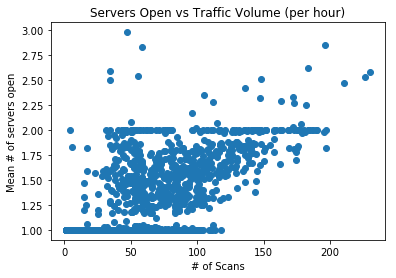

In [30]:
temp=passengers_df.loc[:,['S2','C0']].dropna()
temp['S2']=[x[:-3] for x in temp.S2]
temp=temp.groupby('S2').agg(['mean', 'count'])
#temp.head()

plt.plot(temp.C0['count'],temp.C0['mean'], 'o')
plt.xlabel('# of Scans')
plt.ylabel('Mean # of servers open')
plt.title('Servers Open vs Traffic Volume (per hour)')

In general there are more servers open at times with higher traffic. However, we do see instances whtere there are up to 3 servers open but low traffic. This may be because the airfield was expecting more passengers than actually showed up.

We can also look at how long passengers are waiting, given the number of servers open at S1, S2 and on average. Ideally, all passengers should wait the same amount of time regardless of the number of servers open.

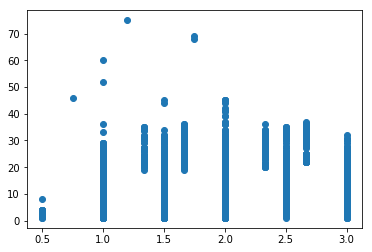

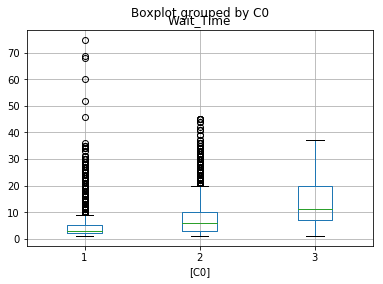

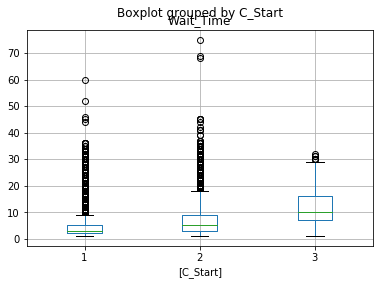

In [31]:
temp=passengers_df.loc[:,['Wait_Time','C_avg']].dropna()
plt.plot(temp.C_avg,temp.Wait_Time, 'o')
plt.show()

passengers_df.loc[:,['Wait_Time','C0']].dropna().boxplot(by='C0')
passengers_df.loc[:,['Wait_Time','C_Start']].dropna().boxplot(by='C_Start')

From the boxplots we can see that even with three servers open, passengers are waiting up to 40 minutes. Therefore, I think the airfield should add more servers to accomodate for higher traffic volumes.

## 5) How early do passengers arrive?

In [32]:
passengers_df['S2_dt']=pd.to_datetime(passengers_df.S2)
passengers_df['Sch_Departure_dt']=pd.to_datetime(passengers_df.Sch_Departure)
passengers_df['Act_Departure_dt']=pd.to_datetime(passengers_df.Act_Departure)
passengers_df['Arrival']=[row['S2_dt'] if row['WT_flag'] else row['S2_dt']-timedelta(minutes=row['Wait_Time']) for i,row in passengers_df.iterrows()]
passengers_df['Sch_Departure_dt - Arrival']=[row['Sch_Departure_dt']-row['Arrival'] for i,row in passengers_df.iterrows()]
passengers_df['Act_Departure_dt - Arrival']=[row['Act_Departure_dt']-row['Arrival'] for i,row in passengers_df.iterrows()]

passengers_df.head()

,valid_P_ID,Airfield,S2,Wait_Time,C_Start,C0,C_avg,Sch_Departure,Act_Departure,BFO_Dest_City,...,Delay_in_minutes,S2_Month,S2_Hour,S2_Minute,S2_dt,Sch_Departure_dt,Act_Departure_dt,Arrival,Sch_Departure_dt - Arrival,Act_Departure_dt - Arrival
Pass_ID,,,,,,,,,,,,,,,,,,,,,
5348206,1,AUC,2028-09-01 6:37,NaN,1,1,1.0,2028-09-01 8:06,2028-09-01 8:06,BORQUE,...,0.0,9,6,37,2028-09-01 06:37:00,2028-09-01 08:06:00,2028-09-01 08:06:00,2028-09-01 06:37:00,01:29:00,01:29:00
5348209,1,AUC,2028-09-01 6:38,NaN,1,1,1.0,2028-09-01 8:06,2028-09-01 8:06,BORQUE,...,0.0,9,6,38,2028-09-01 06:38:00,2028-09-01 08:06:00,2028-09-01 08:06:00,2028-09-01 06:38:00,01:28:00,01:28:00
5348216,1,AUC,2028-09-01 6:39,NaN,1,1,1.0,2028-09-01 8:06,2028-09-01 8:06,BORQUE,...,0.0,9,6,39,2028-09-01 06:39:00,2028-09-01 08:06:00,2028-09-01 08:06:00,2028-09-01 06:39:00,01:27:00,01:27:00
5348224,1,AUC,2028-09-01 6:39,NaN,1,1,1.0,2028-09-01 8:06,2028-09-01 8:06,BORQUE,...,0.0,9,6,39,2028-09-01 06:39:00,2028-09-01 08:06:00,2028-09-01 08:06:00,2028-09-01 06:39:00,01:27:00,01:27:00
5348225,1,AUC,2028-09-01 6:40,NaN,1,1,1.0,2028-09-01 8:06,2028-09-01 8:06,BORQUE,...,0.0,9,6,40,2028-09-01 06:40:00,2028-09-01 08:06:00,2028-09-01 08:06:00,2028-09-01 06:40:00,01:26:00,01:26:00


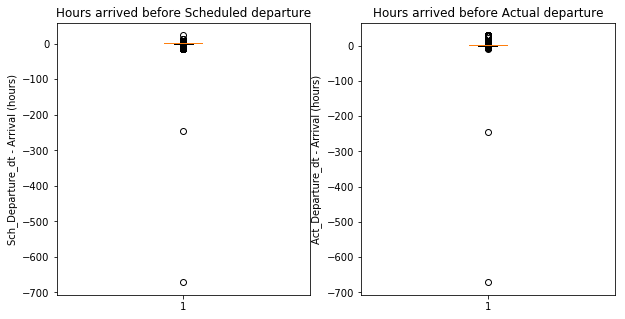

In [33]:
plt.subplots(figsize=(10,5))

plt.subplot(121)
plt.boxplot([x.total_seconds()/60/60 for x in passengers_df['Sch_Departure_dt - Arrival']])
plt.ylabel("Sch_Departure_dt - Arrival (hours)")
plt.title("Hours arrived before Scheduled departure")

plt.subplot(122)
plt.boxplot([x.total_seconds()/60/60 for x in passengers_df['Act_Departure_dt - Arrival']])
plt.ylabel("Act_Departure_dt - Arrival (hours)")
plt.title("Hours arrived before Actual departure")

plt.show()

In [34]:
passengers_df[passengers_df['Sch_Departure_dt - Arrival'] <= timedelta(hours=-240)]

,valid_P_ID,Airfield,S2,Wait_Time,C_Start,C0,C_avg,Sch_Departure,Act_Departure,BFO_Dest_City,...,Delay_in_minutes,S2_Month,S2_Hour,S2_Minute,S2_dt,Sch_Departure_dt,Act_Departure_dt,Arrival,Sch_Departure_dt - Arrival,Act_Departure_dt - Arrival
Pass_ID,,,,,,,,,,,,,,,,,,,,,
5783735,1,AUC,2028-10-17 7:04,NaN,1,2,1.0,2028-10-07 2:21,2028-10-07 2:16,BOR030,...,-5.0,10,7,4,2028-10-17 07:04:00,2028-10-07 02:21:00,2028-10-07 02:16:00,2028-10-17 07:04:00,-11 days +19:17:00,-11 days +19:12:00
6349635,1,AUC,2028-12-21 19:29,NaN,1,2,1.0,2028-11-23 19:46,2028-11-23 19:46,BORSAF,...,0.0,12,19,29,2028-12-21 19:29:00,2028-11-23 19:46:00,2028-11-23 19:46:00,2028-12-21 19:29:00,-28 days +00:17:00,-28 days +00:17:00


In [35]:
passengers_df[passengers_df['Act_Departure_dt - Arrival'] <= timedelta(hours=-240)]

,valid_P_ID,Airfield,S2,Wait_Time,C_Start,C0,C_avg,Sch_Departure,Act_Departure,BFO_Dest_City,...,Delay_in_minutes,S2_Month,S2_Hour,S2_Minute,S2_dt,Sch_Departure_dt,Act_Departure_dt,Arrival,Sch_Departure_dt - Arrival,Act_Departure_dt - Arrival
Pass_ID,,,,,,,,,,,,,,,,,,,,,
5783735,1,AUC,2028-10-17 7:04,NaN,1,2,1.0,2028-10-07 2:21,2028-10-07 2:16,BOR030,...,-5.0,10,7,4,2028-10-17 07:04:00,2028-10-07 02:21:00,2028-10-07 02:16:00,2028-10-17 07:04:00,-11 days +19:17:00,-11 days +19:12:00
6349635,1,AUC,2028-12-21 19:29,NaN,1,2,1.0,2028-11-23 19:46,2028-11-23 19:46,BORSAF,...,0.0,12,19,29,2028-12-21 19:29:00,2028-11-23 19:46:00,2028-11-23 19:46:00,2028-12-21 19:29:00,-28 days +00:17:00,-28 days +00:17:00


We see two passengers who arrived over 240 hours (10 days) after their scheduled and actual departure. Perhaps they really messed up, but more likely, this is a data collection/input error. We will therefore ignore these two observations.

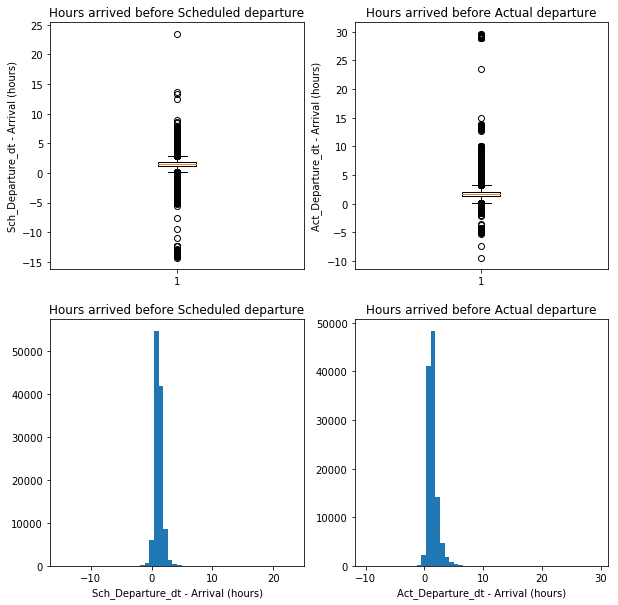

(count                    114130
 mean     0 days 01:31:59.017961
 std      0 days 00:42:43.860395
 min           -1 days +09:38:00
 25%             0 days 01:10:00
 50%             0 days 01:29:00
 75%             0 days 01:51:00
 max             0 days 23:30:00
 Name: Sch_Departure_dt - Arrival, dtype: object,
 count                    114130
 mean     0 days 01:47:10.974853
 std      0 days 00:58:43.656085
 min           -1 days +14:29:00
 25%             0 days 01:17:00
 50%             0 days 01:37:00
 75%             0 days 02:04:00
 max             1 days 05:40:00
 Name: Act_Departure_dt - Arrival, dtype: object)

In [36]:
passengers_omitted=passengers_df[passengers_df['Sch_Departure_dt - Arrival'] > timedelta(hours=-240)].copy()
passengers_omitted['Sch_Departure_dt - Arrival (hours)']=[x.total_seconds()/60/60 for x in passengers_omitted['Sch_Departure_dt - Arrival']]
passengers_omitted['Act_Departure_dt - Arrival (hours)']=[x.total_seconds()/60/60 for x in passengers_omitted['Act_Departure_dt - Arrival']]


plt.subplots(figsize=(10,10))

plt.subplot(221)
plt.boxplot([passengers_omitted['Sch_Departure_dt - Arrival (hours)']])
plt.ylabel("Sch_Departure_dt - Arrival (hours)")
plt.title("Hours arrived before Scheduled departure")

plt.subplot(222)
plt.boxplot([passengers_omitted['Act_Departure_dt - Arrival (hours)']])
plt.ylabel("Act_Departure_dt - Arrival (hours)")
plt.title("Hours arrived before Actual departure")

plt.subplot(223)
hist=np.histogram([passengers_omitted['Sch_Departure_dt - Arrival (hours)']], bins=50)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/50)
plt.xlabel("Sch_Departure_dt - Arrival (hours)")
plt.title("Hours arrived before Scheduled departure")

plt.subplot(224)
hist=np.histogram([passengers_omitted['Act_Departure_dt - Arrival (hours)']], bins=50)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/50)
plt.xlabel("Act_Departure_dt - Arrival (hours)")
plt.title("Hours arrived before Actual departure")

plt.show()

passengers_omitted['Sch_Departure_dt - Arrival'].describe(),passengers_omitted['Act_Departure_dt - Arrival'].describe()

We observe that the times spent at the airport are normally distributed, with time until actual departure slightly left skewed. People tend to arrive about an hour and a half before scheduled departure.

In [54]:
len(passengers_omitted[passengers_omitted['Act_Departure_dt - Arrival'] < timedelta(seconds=0)])

215

In [65]:
passengers_omitted.query("Act_Departure_dt < S2_dt & Act_Departure_dt >= Arrival").Wait_Time.describe()

count    68.000000
mean     17.485294
std      11.573893
min       2.000000
25%       5.750000
50%      15.500000
75%      29.000000
max      36.000000
Name: Wait_Time, dtype: float64

Ignoring the ommited observations, we see 215 passengers who arrived after their flight had already left and therefore missed their flight. Realistically, more passengers would have missed their flight as it takes time to go through screening. There were 68 cases of people arriving before the flight left but not getting through security in time. For these cases many of the wait times were over 30 minutes so perhaps they would have made it if they hadn't had to wait so long. However, in my experience, it is wise to expect longer wait times.

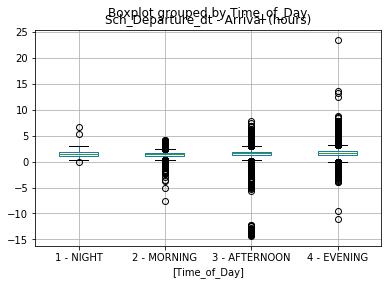

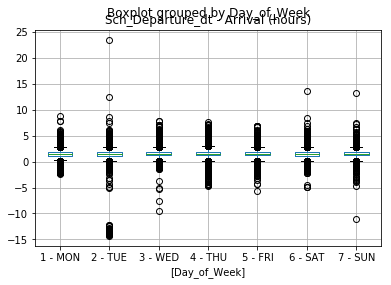

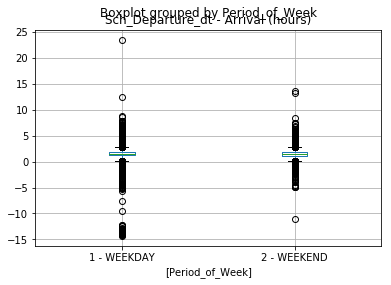

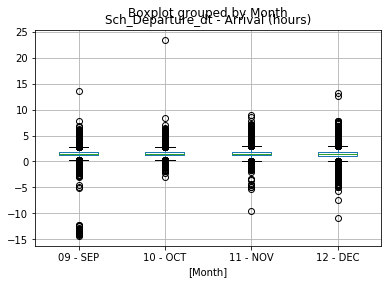

In [38]:
passengers_omitted.loc[:,['Time_of_Day','Sch_Departure_dt - Arrival (hours)']].boxplot(by='Time_of_Day')
passengers_omitted.loc[:,['Day_of_Week','Sch_Departure_dt - Arrival (hours)']].boxplot(by='Day_of_Week')
passengers_omitted.loc[:,['Period_of_Week','Sch_Departure_dt - Arrival (hours)']].boxplot(by='Period_of_Week')
passengers_omitted.loc[:,['Month','Sch_Departure_dt - Arrival (hours)']].boxplot(by='Month')

In general, passengers aim to arrive about an hour and a half before scheduled departure regardless of the day or time. 

## 6) Size of Flights

Most flights have between 20 and 40 passengers. Afternoon flights are generally larger, and flights from Wednesday to Friday tend to be larger, as are flights nearer the end of the year.

The following boxplots give us an easy visual summary and it is easy to compare means and interquartile ranges. From looking at all the plots, we can deem flights with over 75 passengers large.


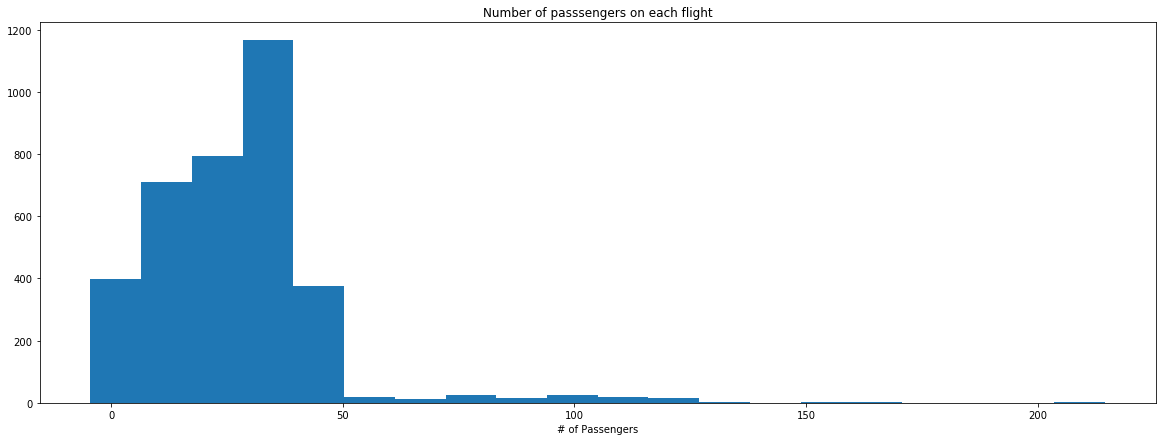

count    3584.000000
mean       31.845982
std        18.754231
min         1.000000
25%        19.750000
50%        32.000000
75%        41.000000
max       220.000000
Name: tot_pass, dtype: float64

In [39]:
plt.figure(1)
plt.subplots(figsize=(20, 7))

hist=np.histogram(flights_df['tot_pass'],bins=20)
plt.bar(hist[1][:-1],hist[0], width=(hist[1][-1]-hist[1][0])/20)
plt.title('Number of passsengers on each flight')
plt.xlabel('# of Passengers')

plt.show()

flights_df['tot_pass'].describe()

In [40]:
flights_df['Sch_Hour']=[datetime.fromtimestamp(x).hour for x in flights_df.Sch_Departure]
flights_df['Act_Hour']=[datetime.fromtimestamp(x).hour for x in flights_df.Act_Departure]

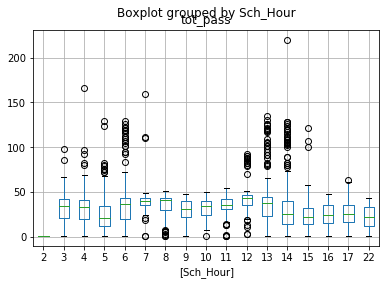

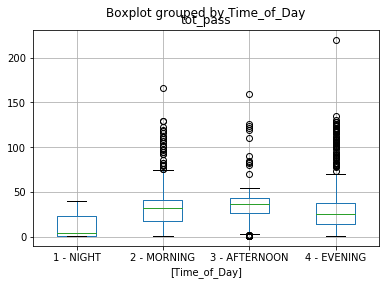

In [41]:
flights_df.loc[:,['Sch_Hour','tot_pass']].boxplot(by='Sch_Hour')

flights_df.loc[:,['Time_of_Day','tot_pass']].boxplot(by='Time_of_Day')

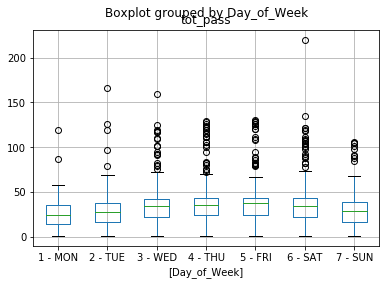

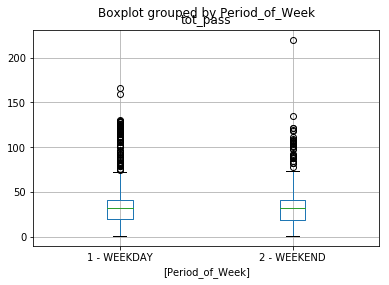

In [42]:
flights_df.loc[:,['Day_of_Week','tot_pass']].boxplot(by='Day_of_Week')

flights_df.loc[:,['Period_of_Week','tot_pass']].boxplot(by='Period_of_Week')

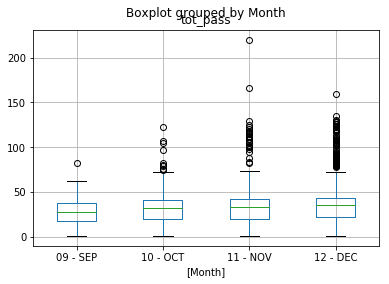

In [43]:
flights_df.loc[:,['Month','tot_pass']].boxplot(by='Month')

## 7)

We do not have the actual destination of each flight but we know how many different countries the passengers are headed to and the most common one. If there is only one destination country, we can assume that is the flight's destination. We can also assume that the flight is domestic if the mode country is Borealia -- even if there are passengers with different final destinatons, it would be unrealistic for passengers to take international flights if their final destination was within Borealia. An exception to this would be if the flight made a stop within Borealia before continuing to an international destination. We don't know how common this is at AUC airfield so it's hard to know for sure.

In other cases, we can infer that flights with multiple destination countries are headed towards the mode destination country.

In [44]:
for i,row in flights_df.iterrows():
    if row['mode_BFO_Dest_Country_Code']=='BOR':
        flights_df.set_value(i,'Destination','Domestic')
    elif row['N_of_Dest_Country']==1:
        flights_df.set_value(i,'Destination','International')
    else:
        flights_df.set_value(i,'Destination','International?')
        
flights_df['Est_Destination']=[dest if dest=='Domestic' else 'International' for dest in flights_df.Destination]

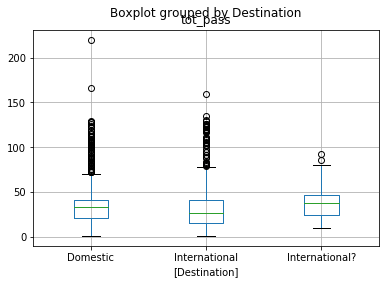

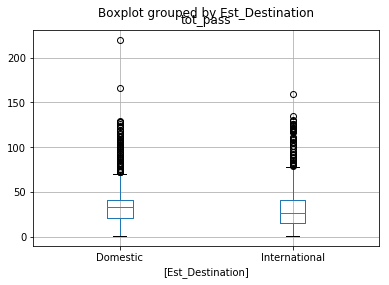

In [45]:
flights_df.loc[:,['Destination','tot_pass']].dropna().boxplot(by='Destination')
flights_df.loc[:,['Est_Destination','tot_pass']].dropna().boxplot(by='Est_Destination')

The size of domestic and international flights seem to be fairly similar but international flights have larger range but smaller mean size. We will say, with uncertainty, that domestic flights are generally larger but perhaps international flights have larger capacities.

## 8) Flight Delays

Flights tend to be delayed more later in the day. This could be because most the airfield is functioning on schedule at the start of the day but delays compound over the course of the day -- once a flight is delayed it might cause subsequent flights to also be delayed. 

We also see that flights have greater delays nearer December. If Borealia has a climate like Canada's, weather will be a factor.

The day of the week does not seem to have a big effect on delay times.

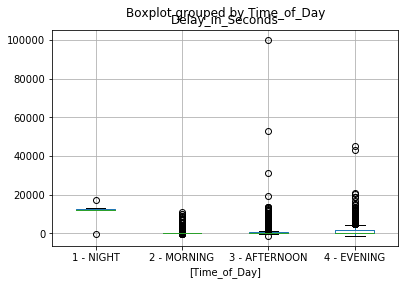

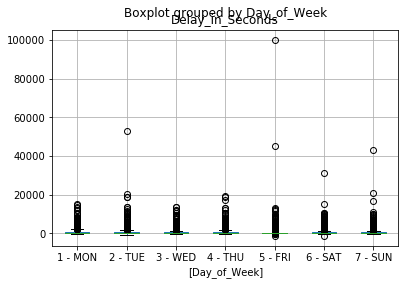

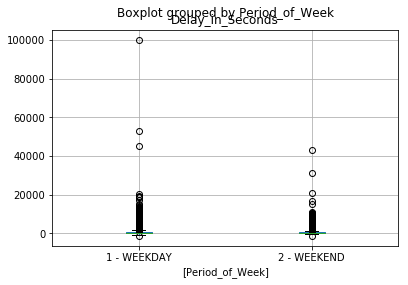

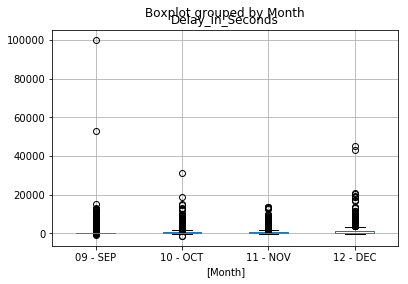

In [46]:
flights_df.loc[:,['Time_of_Day','Delay_in_Seconds']].boxplot(by='Time_of_Day')
flights_df.loc[:,['Day_of_Week','Delay_in_Seconds']].boxplot(by='Day_of_Week')
flights_df.loc[:,['Period_of_Week','Delay_in_Seconds']].boxplot(by='Period_of_Week')
flights_df.loc[:,['Month','Delay_in_Seconds']].boxplot(by='Month')

In [47]:
print("This notebook ran in {} seconds".format(time()-start))

This notebook ran in 67.37603688240051 seconds
